<a href="https://colab.research.google.com/github/felipe-ml/portif-lio/blob/main/C%C3%B3pia_de_Customers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd

# Lê o arquivo CSV
df = pd.read_csv('/content/CLUSTER.csv')

# Remove linhas com valores ausentes (NaN)
df = df.dropna()

# Remove as linhas onde 'Cod Cliente' é igual a 1
df = df[df['Cod Cliente'] != 1]

# Remove as colunas especificadas
colunas_para_remover = ['Cod Filial', 'Quantidade de Compras', 'Valor Total de Vendas']
df.drop(columns=colunas_para_remover, inplace=True)

# Exibe as primeiras linhas do DataFrame atualizado
df.head()


,Cod Cliente,Produto Mais Vendido,Idade,Genero
1,1004,2172,25,0
2,1009,2735,24,1
3,1016,2733,18,1
4,1023,3803,34,1
5,1035,2737,27,1


In [ ]:
obj_padronizado = StandardScaler().fit(df)
df_padronizado = obj_padronizado.transform(df)
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['Cod Cliente','Produto Mais Vendido','Idade', 'Genero']
df_padronizado.head()
obj_normalizacao = MinMaxScaler().fit(df)
df_normalizado = obj_normalizacao.transform(df)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['Cod Cliente','Produto Mais Vendido','Idade', 'Genero']
df_normalizado.describe()

,Cod Cliente,Produto Mais Vendido,Idade,Genero
count,568.000000,568.000000,568.000000,568.000000
mean,0.618288,0.422460,0.484875,0.505282
std,0.276645,0.247824,0.292120,0.500413
min,0.000000,0.000000,0.000000,0.000000
25%,0.421836,0.232352,0.227273,0.000000
50%,0.729198,0.412814,0.500000,1.000000
75%,0.784816,0.590543,0.727273,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Imprime as contagens para 'Genero'
print("Contagem por Gênero:")
print(df['Genero'].value_counts())

# Imprime as contagens para 'Produto Mais Vendido'
print("\nContagem por Produto Mais Vendido:")
print(df['Produto Mais Vendido'].value_counts())

Contagem por Gênero:
1    287
0    281
Name: Genero, dtype: int64

Contagem por Produto Mais Vendido:
1442    22
3788    15
3811    15
228     12
2737    10
        ..
1173     1
3150     1
539      1
2825     1
4939     1
Name: Produto Mais Vendido, Length: 326, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 1 to 568
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cod Cliente           568 non-null    int64
 1   Produto Mais Vendido  568 non-null    int64
 2   Idade                 568 non-null    int64
 3   Genero                568 non-null    int64
dtypes: int64(4)
memory usage: 22.2 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

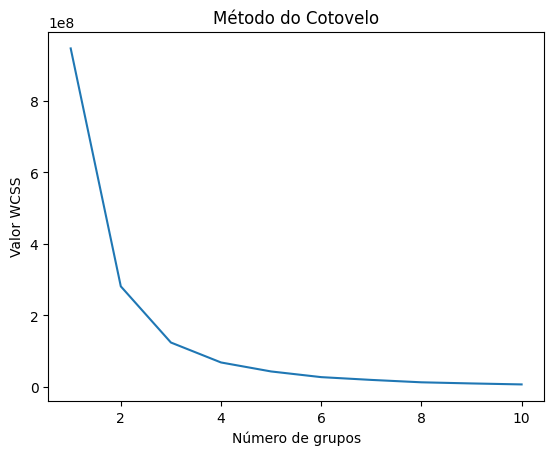

In [ ]:
from sklearn.cluster import KMeans  # Importe a classe KMeans

WCSS = []
X = df.iloc[:, 1:].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

import matplotlib.pyplot as plt  # Certifique-se de importar a biblioteca de plotagem
plt.plot(range(1, 11), WCSS)
plt.title('Método do Cotovelo')
plt.xlabel('Número de grupos')
plt.ylabel('Valor WCSS')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters = 4, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


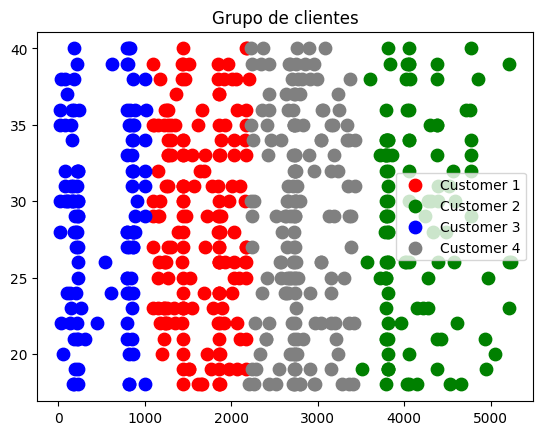

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, c = 'red', label='Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, c = 'green', label='Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, c = 'blue', label='Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, c = 'grey', label='Customer 4')
plt.title('Grupo de clientes')
plt.legend()
plt.show()

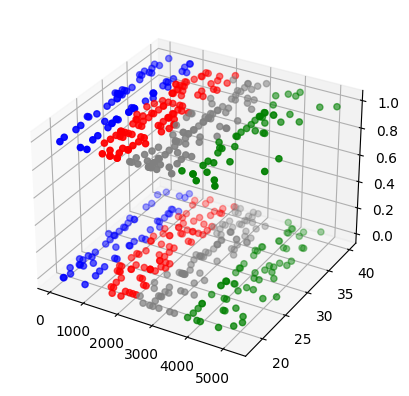

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plota os clusters
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], c='red', label='Customer 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], c='green', label='Customer 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], c='blue', label='Customer 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], c='grey', label='Customer 4')

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

dbs_score = davies_bouldin_score(X, y_kmeans)
ch_score = calinski_harabasz_score(X, y_kmeans)
within_cluster_ss = kmeans.inertia_ / kmeans.n_clusters
between_cluster_ss = kmeans.inertia_ - within_cluster_ss
print(dbs_score)
print(ch_score)
print(within_cluster_ss)
print(between_cluster_ss / kmeans.n_clusters)

0.5072414290431062
2399.4814443917826
738314.1613219492
664482.7451897543


In [ ]:
df['Cluster'] = y_kmeans + 1

In [ ]:
print(df)

     Cod Cliente  Produto Mais Vendido  Idade  Genero  Cluster
1           1004                  2172     25       0        1
2           1009                  2735     24       1        4
3           1016                  2733     18       1        4
4           1023                  3803     34       1        2
5           1035                  2737     27       1        4
..           ...                   ...    ...     ...      ...
564          957                  1429     22       1        1
565          965                   826     20       0        3
566          984                  1891     23       1        1
567          990                  4939     21       0        2
568          999                   865     27       1        3

[568 rows x 5 columns]


In [ ]:
cluster_counts = pd.Series(y_kmeans).value_counts()
print(cluster_counts)


0    172
3    167
2    119
1    110
dtype: int64


In [ ]:
pip install plotly


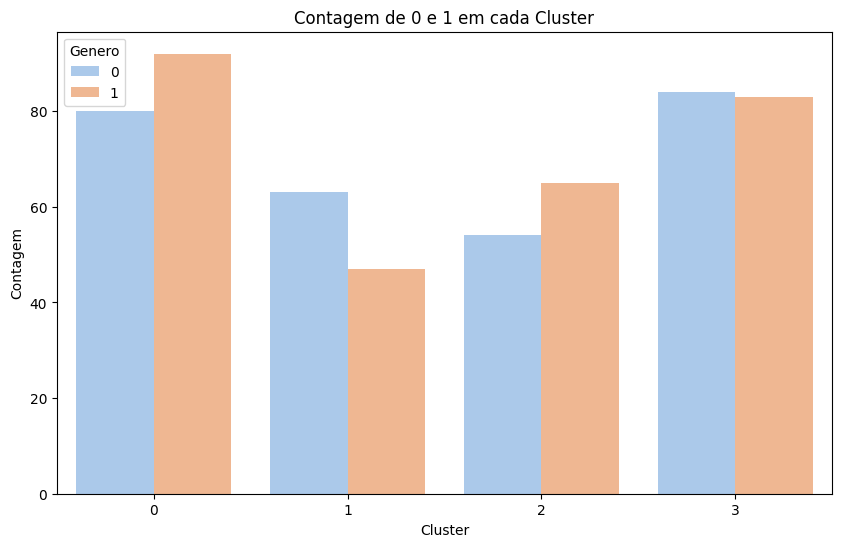

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adapte conforme necessário
df['Cluster'] = y_kmeans  # Assumindo que os rótulos dos clusters estão em y_kmeans
df['Genero'] = df['Genero']  # Assumindo que os valores 0 e 1 estão na coluna 'Target'

# Cria um DataFrame com a contagem de valores 0 e 1 em cada cluster
count_df = df.groupby(['Cluster', 'Genero']).size().reset_index(name='Count')

# Plota um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', hue='Genero', data=count_df, palette='pastel')
plt.title('Contagem de 0 e 1 em cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()

In [ ]:
print(df)

     Cod Cliente  Produto Mais Vendido  Idade  Genero  Cluster
1           1004                  2172     25       0        0
2           1009                  2735     24       1        3
3           1016                  2733     18       1        3
4           1023                  3803     34       1        1
5           1035                  2737     27       1        3
..           ...                   ...    ...     ...      ...
564          957                  1429     22       1        0
565          965                   826     20       0        2
566          984                  1891     23       1        0
567          990                  4939     21       0        1
568          999                   865     27       1        2

[568 rows x 5 columns]


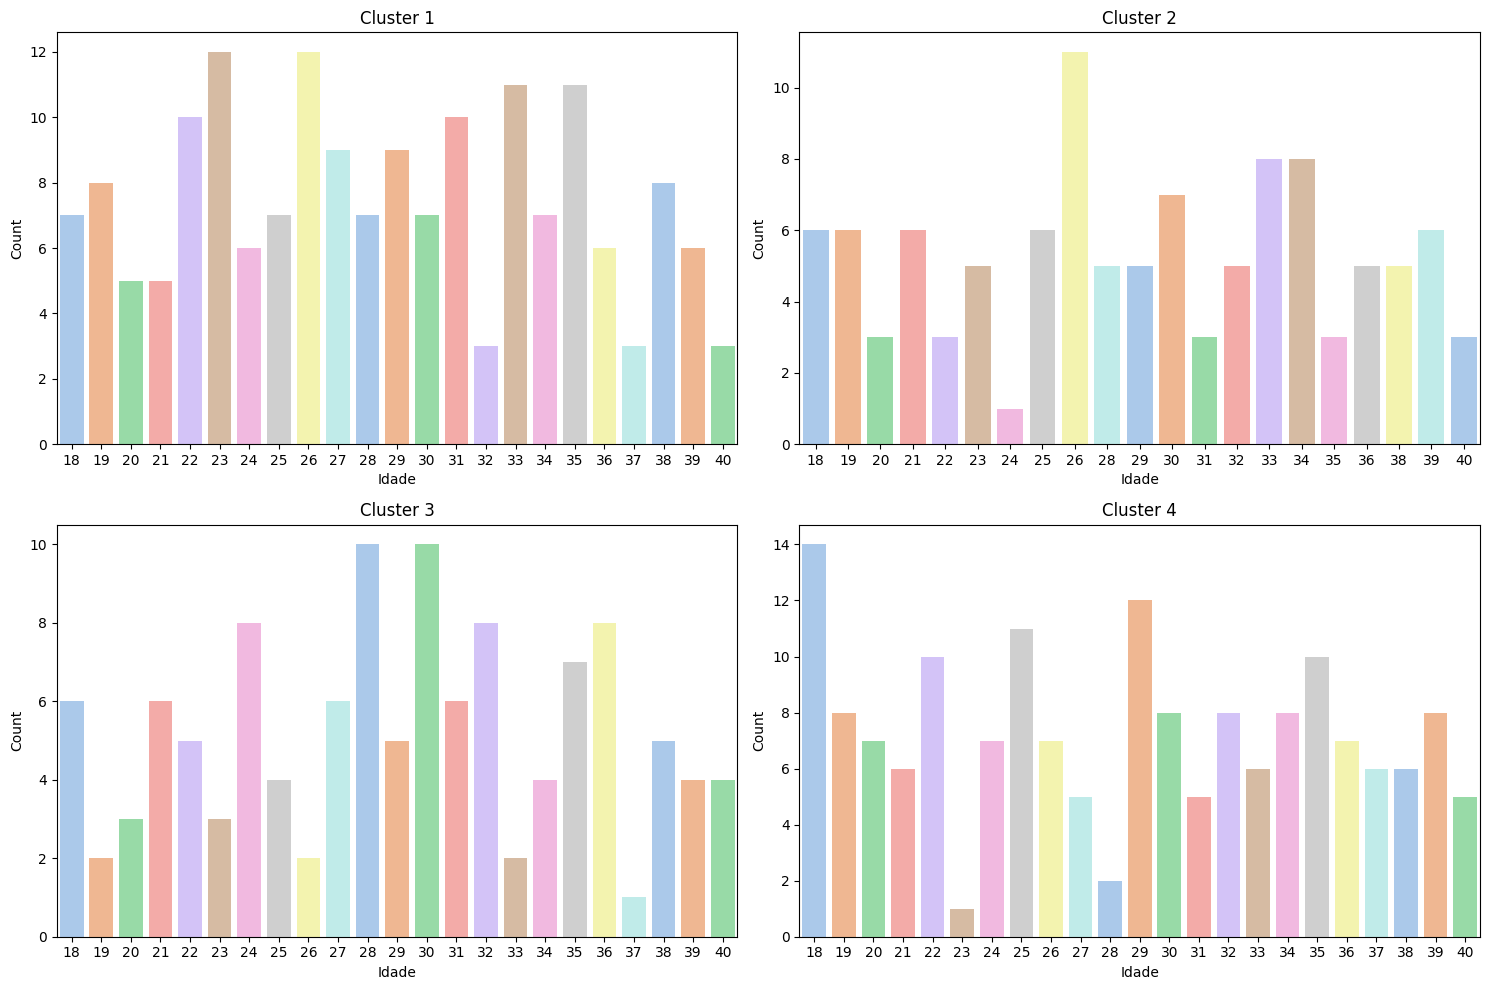

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Adapte conforme necessário
df['Cluster'] = y_kmeans  # Assumindo que os rótulos dos clusters estão em y_kmeans
df['Idade'] = df['Idade']  # Assumindo que os valores 0 e 1 estão na coluna 'Idade'
# Filtra o DataFrame para cada cluster e calcula a contagem de valores 0 e 1 para a idade
cluster_1_df = df[df['Cluster'] == 0].groupby('Idade').size().reset_index(name='Count')
cluster_2_df = df[df['Cluster'] == 1].groupby('Idade').size().reset_index(name='Count')
cluster_3_df = df[df['Cluster'] == 2].groupby('Idade').size().reset_index(name='Count')
cluster_4_df = df[df['Cluster'] == 3].groupby('Idade').size().reset_index(name='Count')
# Configuração da figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Plota os gráficos de barras para cada cluster
sns.barplot(x='Idade', y='Count', data=cluster_1_df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Cluster 1')
sns.barplot(x='Idade', y='Count', data=cluster_2_df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Cluster 2')
sns.barplot(x='Idade', y='Count', data=cluster_3_df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Cluster 3')
sns.barplot(x='Idade', y='Count', data=cluster_4_df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Cluster 4')
# Ajusta o layout
plt.tight_layout()
plt.show()

In [ ]:
# # Agrupar os dados por cluster e gênero e contar o número de pessoas
# agrupado = df.groupby(['Cluster', 'Genero']).size().unstack()

# # Obter os clusters únicos
# clusters_unicos = df['Cluster'].unique()
# num_clusters = len(clusters_unicos)

# largura_barra = 0.4  # Largura das barras

# # Coordenadas para os clusters
# clusters_x = np.arange(num_clusters)

# # Criar o gráfico de barras para "homem"
# plt.bar(clusters_x - largura_barra/2, agrupado[0], width=largura_barra, label='Homem', color='blue')

# # Criar o gráfico de barras para "mulher"
# plt.bar(clusters_x + largura_barra/2, agrupado[1], width=largura_barra, label='Mulher', color='pink')

# # Definir os rótulos dos clusters no eixo x
# plt.xticks(clusters_x, clusters_unicos)

# # Adicione rótulos aos eixos e um título
# plt.xlabel('Clusters')
# plt.ylabel('Quantidade de Pessoas')
# plt.title('Gráfico de Barras: Quantidade de Pessoas por Cluster e Gênero')

# # Adicione uma legenda
# plt.legend()

# # Mostre o gráfico
# plt.show()


In [ ]:
# Substitua 'seu_arquivo.csv' pelo nome do arquivo que deseja usar para salvar o DataFrame
nome_arquivo = 'Cluster_Domini.csv'

# Use o método 'to_csv' para salvar o DataFrame em um arquivo CSV
df.to_csv(nome_arquivo, index=False)

from google.colab import files

# Faça o download do arquivo CSV para a sua máquina local
files.download(nome_arquivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>